This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

Nombre d'images et taille de ces images

In [3]:
train_labels.shape

(60000,)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Affichons la cinquantième image**

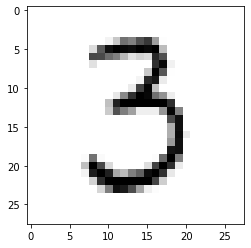

In [5]:
import matplotlib.pyplot as plt
digit = train_images[50]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
train_labels[50]

3

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Deux couches : 512 et 10 neurones

**The compilation step**

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

On prépare les données d'entrainement

In [12]:
train_images = train_images.reshape((60000, 28 * 28))

In [13]:
train_images.shape

(60000, 784)

In [14]:
train_images.dtype

dtype('uint8')

In [15]:
train_images = train_images.astype("float32")

In [16]:
train_images.dtype

dtype('float32')

On divise par 255 pour avoir des valeurs comprises entre 0 et 1.

In [17]:
train_images = train_images / 255

On fait la même chose pour les images de test

In [18]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 7ms/step - loss: 0.2648 - accuracy: 0.9234
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1075 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0708 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0515 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0383 - accuracy: 0.9890


**Using the model to make predictions**

In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 107ms/step


array([5.5414123e-08, 1.3817674e-09, 2.9726150e-06, 5.8434503e-06,
       7.3322910e-12, 7.1814918e-09, 6.8703067e-13, 9.9998844e-01,
       4.7601333e-08, 2.7406907e-06], dtype=float32)

In [21]:
predictions[0].argmax()

7

In [22]:
predictions[0][7]

0.99998844

In [23]:
test_labels[0]

7

**Evaluating the model on new data**

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=128)
print(f"test_acc: {test_acc}")

79/79 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9803
test_acc: 0.9803000092506409


## Data representations for neural networks

### Scalars (rank-0 tensors) <=> tenseur d'ordre 0 (représenté par un tableau à 0 dimension)

In [25]:
import numpy as np
x = np.array(12)
x

array(12)

In [26]:
x.ndim

0

L'ordre d'un tenseur est obtenu avec l'attribut ``ndim`` qui correspond au nombre de dimensions du tableau.

### Vectors (rank-1 tensors) <=> tenseur d'ordre 1 (représenté par un tableau à 1 dimension ou tableau 1D)

In [27]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [28]:
x.ndim

1

### Matrices (rank-2 tensors) <=> tenseur d'ordre 2 (représenté par un tableau à 2 dimensions ou tableau 2D)

In [29]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors <=> tenseur d'ordre supérieur (représenté par un tableau à n dimensions)

In [30]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim
x.shape

(3, 3, 5)

### Key attributes

In [31]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [32]:
train_images.ndim

3

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

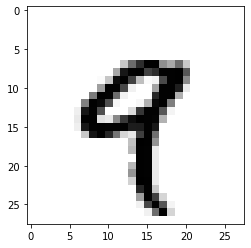

In [35]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [36]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [37]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [40]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [41]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [42]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [43]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [44]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

## Quelques fonctions utiles pour la manipulation des tenseurs

###  La fonction ``numpy.expand_dims()``

Cette fonction permet d'augmenter ``ndim`` le nombre de dimensions d'un tableau et donc l'ordre du tenseur qu'il représente, tout en précisant l'axe à ajouter.

In [45]:
a = np.array([1, 2, 3])
a.shape

(3,)

In [46]:
b = np.expand_dims(a, axis=0)
b.shape

(1, 3)

In [47]:
b

array([[1, 2, 3]])

In [48]:
c = np.expand_dims(a, axis=1)
c.shape

(3, 1)

In [49]:
c

array([[1],
       [2],
       [3]])

In [50]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.shape

(2, 3)

In [51]:
b = np.expand_dims(a, axis=0)
b.shape

(1, 2, 3)

In [52]:
c = np.expand_dims(a, axis=1)
c.shape

(2, 1, 3)

In [53]:
d = np.expand_dims(a, axis=2)
d.shape

(2, 3, 1)

###  La fonction ``numpy.concatenate()``

Cette fonction permet de concaténer des tableaux donnés dans une liste, tout en précisant l'axe de la concaténation.

#### Exemple pour des tableaux 1D

In [54]:
a = np.array([1, 2])
a.shape

(2,)

In [55]:
b = np.array([3, 4])
b.shape

(2,)

In [56]:
c = [a, b]
c

[array([1, 2]), array([3, 4])]

In [57]:
type(c)

list

In [58]:
np.concatenate(c)

array([1, 2, 3, 4])

Par défaut, la concaténation se fait suivant l'axe 0.

In [59]:
np.concatenate(c, axis=0)

array([1, 2, 3, 4])

In [60]:
d = [a] * 2
d

[array([1, 2]), array([1, 2])]

In [61]:
np.concatenate(d)

array([1, 2, 1, 2])

#### Exemple pour des tableaux 2D

In [62]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.shape

(2, 3)

In [63]:
b = [a] * 2
b

[array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3],
        [4, 5, 6]])]

**Concaténation suivant l'axe 0**

In [64]:
c = np.concatenate(b, axis=0)
c

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [65]:
c.shape

(4, 3)

**Concaténation suivant l'axe 1**

In [66]:
d = np.concatenate(b, axis=1)
d

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [67]:
d.shape

(2, 6)

## La fonction ``numpy.maximum()``

Cette fonction permet de comparer des tenseurs et de récupérer la valeur du maximum entre les deux.

In [68]:
import numpy as np
a = np.array([2, 3, 4])
b = np.array([1, 5, 2])
np.maximum(a, b)

array([2, 5, 4])

In [69]:
c = np.array([[6, 3],
              [3, 7],
              [8, 9]])
d = np.array([4, 5])
np.maximum(c, d)

array([[6, 5],
       [4, 7],
       [8, 9]])

Cette opération a été possible parce qu'on retrouve la même ``shape`` pour le deuxième tenseur et les derniers axes du premier tenseur.

In [70]:
x = np.random.random((5, 4, 3))
y = np.random.random((4, 3))
z = np.maximum(x, y)
z.shape

(5, 4, 3)

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [71]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

*Ajout DC*

In [72]:
x = np.linspace(-0.5, 0.5, 51)
x = np.expand_dims(x, axis=0)
val_input = np.concatenate(30 * [x], axis=0)
print(val_input)

[[-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 ...
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]
 [-0.5  -0.48 -0.46 ...  0.46  0.48  0.5 ]]


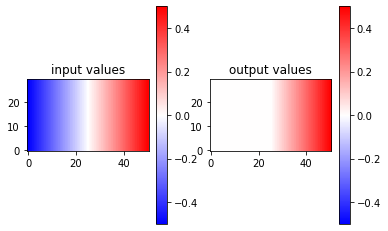

In [73]:
val_output = naive_relu(val_input)

import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(val_input, origin='lower', vmin = -0.5, vmax = 0.5, cmap="bwr")
plt.colorbar() 
plt.title("input values")

plt.subplot(122)
plt.imshow(val_output,origin='lower', vmin = -0.5, vmax = 0.5, cmap="bwr")
plt.colorbar() 
plt.title("output values")

plt.show()

*Fin ajout DC*

In [74]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Comparaison de la durée d'exécution entre versions naïve et vectorisée :

In [75]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.02 s


In [76]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.95 s


### Broadcasting

Our earlier naive implementation of ``naive_add`` only supports the addition of rank-2 tensors with identical shapes. But in the ``Dense`` layer introduced earlier, we added a rank-2 tensor with a vector. What happens with addition when the shapes of the two tensors being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be **broadcasted** to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called **broadcast axes**) are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

Let’s look at a concrete example. Consider ``X`` with shape ``(32, 10)`` and ``y`` with shape ``(10,)``:

In [77]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [78]:
y

array([0.75793548, 0.34608335, 0.13557423, 0.85564918, 0.97355556,
       0.02198413, 0.55466444, 0.42503448, 0.35737071, 0.11410106])

In [79]:
y = np.expand_dims(y, axis=0)
y

array([[0.75793548, 0.34608335, 0.13557423, 0.85564918, 0.97355556,
        0.02198413, 0.55466444, 0.42503448, 0.35737071, 0.11410106]])

In [80]:
y.shape

(1, 10)

In [81]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [82]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

### Tensor product

In [83]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

10.437013796473115

### Tensor reshaping

In [84]:
train_images = train_images.reshape((60000, 28 * 28))

In [85]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [86]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [87]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [88]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [89]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [90]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [91]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [92]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [93]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.02554691, 0.08704507],
       [0.23549604, 0.24188173]], dtype=float32)>

In [94]:
y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.0510938, 3.1740901],
       [3.470992 , 3.4837635]], dtype=float32)>

In [95]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [96]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [99]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [100]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [101]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [102]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2585 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1039 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0693 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0372 - accuracy: 0.9890


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [103]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

*Ajout DC*

In [104]:
layer = NaiveDense(input_size = 3, output_size = 4, activation=tf.nn.relu)
layer

In [105]:
layer.weights

[<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
 array([[0.04278129, 0.08356623, 0.02857635, 0.07649469],
        [0.04188963, 0.06804966, 0.06070392, 0.0101297 ],
        [0.08855138, 0.09675604, 0.02215502, 0.00420802]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

*Fin ajout DC*

#### A simple Sequential class

In [106]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

*Ajout DC*

In [107]:
layer1 = NaiveDense(input_size = 3, output_size = 4, activation=tf.nn.relu)
layer2 = NaiveDense(input_size = 4, output_size = 2, activation=tf.nn.softmax)
model_test = NaiveSequential([layer1, layer2])
model_test.weights

[<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
 array([[0.0134709 , 0.04023309, 0.0514292 , 0.04589927],
        [0.03819617, 0.07353311, 0.04740519, 0.02565645],
        [0.01978501, 0.09600581, 0.07628798, 0.03360529]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4, 2) dtype=float32, numpy=
 array([[0.03795695, 0.07808556],
        [0.05024364, 0.06001967],
        [0.01403775, 0.09326323],
        [0.04902095, 0.0110562 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

*Fin ajout DC*

In [108]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [109]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

*Ajout DC*

In [110]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

In [111]:
batch_generator = BatchGenerator(train_images, train_labels)
batch_generator.num_batches

469

In [112]:
batch_generator.index

0

In [113]:
(batch_images0, batch_labels0) = batch_generator.next()
batch_images0.shape

(128, 784)

In [114]:
batch_generator.index

128

In [115]:
(batch_images1, batch_labels1) = batch_generator.next()
batch_images1.shape

(128, 784)

In [116]:
batch_generator.index

256

*Fin ajout DC*

### Running one training step

In [117]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean( per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [118]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [119]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [120]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [121]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.58
loss at batch 100: 2.26
loss at batch 200: 2.24
loss at batch 300: 2.12
loss at batch 400: 2.27
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.89
loss at batch 200: 1.85
loss at batch 300: 1.74
loss at batch 400: 1.87
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.59
loss at batch 200: 1.52
loss at batch 300: 1.44
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.34
loss at batch 200: 1.25
loss at batch 300: 1.21
loss at batch 400: 1.29
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.16
loss at batch 200: 1.05
loss at batch 300: 1.05
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.91
loss at batch 300: 0.93
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.91
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [122]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Ajout DC : Reprise du modèle initial avec suivi

On réserve 10 000 données d'entrainement comme données de validation.

In [123]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# Reserve 10,000 samples for validation
val_images = train_images[-10000:]
val_labels = train_labels[-10000:]
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, 
                    epochs=5, 
                    batch_size=128, 
                    validation_data = (val_images, val_labels)) # on précise les données de validation

Epoch 1/5
391/391 [==============================] - 4s 9ms/step - loss: 0.2770 - accuracy: 0.9198 - val_loss: 0.1346 - val_accuracy: 0.9634
Epoch 2/5
391/391 [==============================] - 3s 9ms/step - loss: 0.1150 - accuracy: 0.9659 - val_loss: 0.1144 - val_accuracy: 0.9657
Epoch 3/5
391/391 [==============================] - 3s 9ms/step - loss: 0.0755 - accuracy: 0.9779 - val_loss: 0.0853 - val_accuracy: 0.9758
Epoch 4/5
391/391 [==============================] - 4s 9ms/step - loss: 0.0540 - accuracy: 0.9842 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 5/5
391/391 [==============================] - 3s 9ms/step - loss: 0.0399 - accuracy: 0.9884 - val_loss: 0.0784 - val_accuracy: 0.9756


In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [125]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

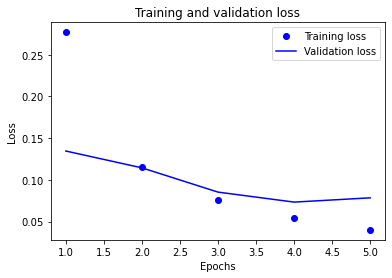

In [126]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

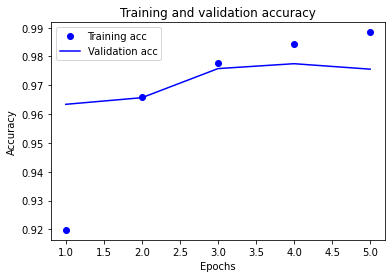

In [127]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Summary